# 只分类阴阳模型

In [112]:
import xgboost as xgb
import numpy as np
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss

In [113]:
data_raw = pd.read_csv('../data/curated/combined_data_div_binned.csv')
data_reduced = pd.read_csv('../data/curated/combined_data_div_binned_reduced.csv')
label = pd.read_csv('../data/curated/combined_label.csv')
significant_features = pd.read_csv('../data/curated/significant_features.csv')
significant_features = significant_features['0'].tolist()
label = (label.sum(axis=1) > 0).astype(int)

In [114]:
X = data_raw[significant_features]

In [115]:
# build a combined model
# split data
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)
# train model
XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)
# make predictions for test data
y_pred = XGB_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
hamming = hamming_loss(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))
print("Hamming Loss: %.2f%%" % (hamming * 100.0))



Accuracy: 67.40%
Precision: 70.24%
Recall: 75.87%
F1: 72.94%
Hamming Loss: 32.60%


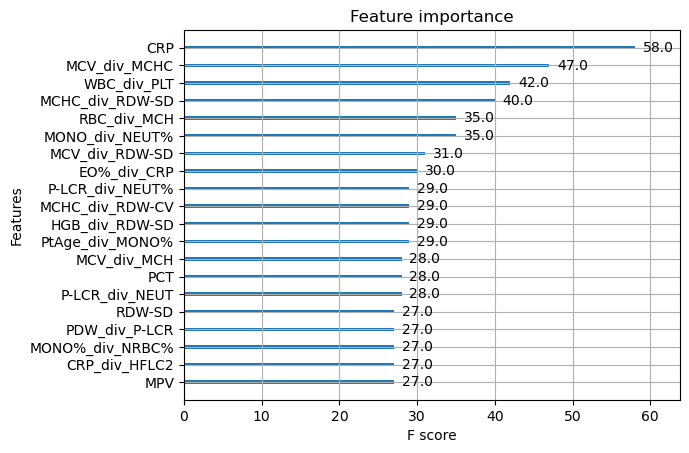

In [116]:
# plot feature importance
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(XGB_model, max_num_features=20)
plt.show()

In [117]:
# keep top 50 features
XGB_top50 = XGB_model.get_booster().feature_names[:50]
X_50 = data_raw[XGB_top50]

# split data
X_train, X_test, y_train, y_test = train_test_split(X_50, label, test_size=0.2, random_state=42)
# train model
XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)
# make predictions for test data
y_pred = XGB_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
hamming = hamming_loss(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))
print("Hamming Loss: %.2f%%" % (hamming * 100.0))

Accuracy: 64.51%
Precision: 68.27%
Recall: 72.40%
F1: 70.27%
Hamming Loss: 35.49%


In [118]:
# random forest
# split data
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)
# train model
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
# make predictions for test data
y_pred = RF_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
hamming = hamming_loss(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))
print("Hamming Loss: %.2f%%" % (hamming * 100.0))

Accuracy: 66.33%
Precision: 69.37%
Recall: 75.00%
F1: 72.07%
Hamming Loss: 33.67%


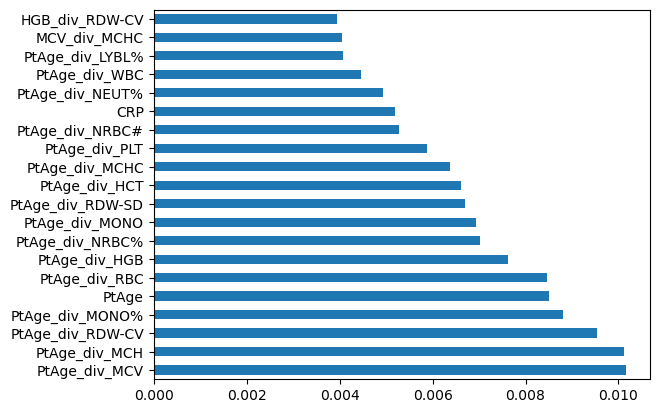

In [121]:
# check feature importance
feat_importances = pd.Series(RF_model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
# keep the top 50 features
RF_top50 = feat_importances.nlargest(55).index.tolist()
X_50 = data_raw[RF_top50]

# split data
X_train, X_test, y_train, y_test = train_test_split(X_50, label, test_size=0.2, random_state=42)
# train model
RF_model = RandomForestClassifier(random_state=1)
RF_model.fit(X_train, y_train)
# make predictions for test data
y_pred = RF_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
hamming = hamming_loss(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))
print("Hamming Loss: %.2f%%" % (hamming * 100.0))

Accuracy: 67.15%
Precision: 69.88%
Recall: 76.08%
F1: 72.85%
Hamming Loss: 32.85%
